# Asset Portfolio Management using Deep Reinforcement Learning
----

## 2.0 Download the Data for the Analysis
---
* Data is Downloaded from Yahoo Finance using an API in the FinRL Library
* The 30 Dow Jones Industrial Average tickers for the period from 2009 to 2020 are used
* The data is downloaded and the cleaned data are saved in csv files for use

---


### 2.1 Import Relevant Packages

In [1]:
import pandas as pd
from finrl.marketdata.yahoodownloader import YahooDownloader
from finrl.config import config
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

### 2.2 Create Folders

In [2]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

### 2.3 Download the Dow Jines Industrial Average 30 Stocks

In [3]:
# Use the finrl.conf to get the tickers for the stocks
ticker_list = config.DOW_30_TICKER

print(ticker_list)

['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ', 'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']


In [4]:
#Download the data

data = YahooDownloader(start_date = '2009-01-01',
                     end_date = '2020-12-31',
                     ticker_list = ticker_list).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [5]:
data.head()

,date,open,high,low,close,volume,tic
0,2008-12-31,3.070357,3.133571,3.047857,2.629544,6.075412e+08,AAPL
1,2009-01-02,3.067143,3.251429,3.041429,2.795913,7.460152e+08,AAPL
2,2009-01-05,3.327500,3.435000,3.311071,2.913912,1.181608e+09,AAPL
3,2009-01-06,3.426786,3.470357,3.299643,2.865849,1.289310e+09,AAPL
4,2009-01-07,3.278929,3.303571,3.223572,2.803923,7.530488e+08,AAPL


### 2.4 Clean the Data

In [6]:
# check for missing values
data.isna().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
tic       0
dtype: int64

In [7]:
# check if all tickers have the same number of data points

no_datasets = []
for i in ticker_list:
    no_data_points = data[data['tic']==i].shape[0]
    no_datasets.append((i,no_data_points))
    data_points_df = pd.DataFrame(no_datasets)

In [8]:
data_points_df.head()

,0,1
0,AAPL,3021
1,MSFT,3021
2,JPM,3021
3,V,3021
4,RTX,3021


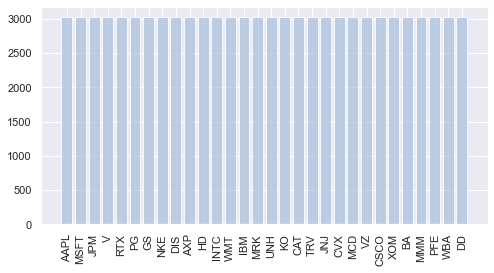

In [9]:
# Plot a bar chart to check that all tickers have same number of data points
plt.subplots(figsize = (8, 4))
plt.bar(data_points_df[0], data_points_df[1],alpha=0.8, color = 'lightsteelblue')
plt.xticks(rotation=90)
plt.show()

### 2.5 Save the Data to csv

In [10]:
data.to_csv('datasets/data.csv', index=False)

### 2.6 Create a Dataset for the Close Prices

In [11]:
df_prices = pd.read_csv('./datasets/data.csv')

In [12]:
# Reset the Index to tic and date
df_prices = df_prices.reset_index().set_index(['tic', 'date']).sort_index()

# Get all the Close Prices
df_close = pd.DataFrame()

for ticker in ticker_list:
    series = df_prices.xs(ticker).close
    df_close[ticker] = series

In [13]:
df_close = df_close.reset_index()

In [14]:
df_close.head()

,date,AAPL,MSFT,JPM,V,RTX,PG,GS,NKE,DIS,...,CVX,MCD,VZ,CSCO,XOM,BA,MMM,PFE,WBA,DD
0,2008-12-31,2.629544,14.793870,23.197927,12.017439,25.218483,42.684620,70.854607,8.608677,19.538342,...,46.442257,43.119572,17.798944,12.189656,52.298050,31.760571,41.426876,10.602845,18.526949,14.225616
1,2009-01-02,2.795913,15.471161,23.346874,12.244266,25.853655,43.361279,72.844467,8.956398,20.597496,...,48.043262,44.201206,18.187479,12.683227,53.483833,33.680935,42.614807,10.938112,19.187819,14.527276
2,2009-01-05,2.913912,15.615757,21.782980,12.331331,25.547832,43.050556,74.540482,9.020543,20.235834,...,48.131180,44.069469,17.053383,12.795406,53.477268,34.365715,42.118034,10.872255,20.156599,14.187901
3,2009-01-06,2.865849,15.798391,22.252140,13.199700,25.820715,42.926285,74.481720,8.838243,20.933319,...,48.564404,43.084919,16.780365,13.303929,52.605965,34.469925,42.614807,10.656727,20.058964,15.130617
4,2009-01-07,2.803923,14.847140,20.919094,12.913300,25.180843,42.173668,70.946960,8.517526,19.960283,...,46.435970,42.460896,16.993446,12.952450,51.263000,33.316200,41.808441,10.471133,20.299286,15.158899


In [15]:
# Get Discriptive statistics
df_close.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,3021.0,29.774923,25.104404,2.409261,12.527516,22.840960,39.965603,136.690002
MSFT,3021.0,60.749048,52.088486,11.608222,23.161726,39.764736,82.383636,231.045105
JPM,3021.0,59.599607,30.744875,11.840996,32.541466,49.910942,89.606987,135.172424
V,3021.0,75.513977,57.717353,9.719345,23.534719,62.117886,111.854652,218.360001
RTX,3021.0,55.128111,16.935249,17.821960,40.476044,57.146088,66.150002,95.950806
PG,3021.0,70.424518,25.255766,30.718750,48.931614,67.136810,79.459030,144.279999
GS,3021.0,160.803851,44.574251,49.704857,132.234436,152.917969,198.745712,259.589996
NKE,3021.0,45.677341,29.728385,6.667215,19.542479,43.954960,62.243969,144.020004
DIS,3021.0,76.499294,37.755172,13.424538,37.300018,86.313766,105.147240,181.169998
AXP,3021.0,68.419750,27.911906,8.458934,44.817966,69.428802,88.312584,134.994659


In [16]:
# Save the Close Price datase

df_close.to_csv('datasets/close_prices.csv', index=False)

In [17]:
df_close.head()

,date,AAPL,MSFT,JPM,V,RTX,PG,GS,NKE,DIS,...,CVX,MCD,VZ,CSCO,XOM,BA,MMM,PFE,WBA,DD
0,2008-12-31,2.629544,14.793870,23.197927,12.017439,25.218483,42.684620,70.854607,8.608677,19.538342,...,46.442257,43.119572,17.798944,12.189656,52.298050,31.760571,41.426876,10.602845,18.526949,14.225616
1,2009-01-02,2.795913,15.471161,23.346874,12.244266,25.853655,43.361279,72.844467,8.956398,20.597496,...,48.043262,44.201206,18.187479,12.683227,53.483833,33.680935,42.614807,10.938112,19.187819,14.527276
2,2009-01-05,2.913912,15.615757,21.782980,12.331331,25.547832,43.050556,74.540482,9.020543,20.235834,...,48.131180,44.069469,17.053383,12.795406,53.477268,34.365715,42.118034,10.872255,20.156599,14.187901
3,2009-01-06,2.865849,15.798391,22.252140,13.199700,25.820715,42.926285,74.481720,8.838243,20.933319,...,48.564404,43.084919,16.780365,13.303929,52.605965,34.469925,42.614807,10.656727,20.058964,15.130617
4,2009-01-07,2.803923,14.847140,20.919094,12.913300,25.180843,42.173668,70.946960,8.517526,19.960283,...,46.435970,42.460896,16.993446,12.952450,51.263000,33.316200,41.808441,10.471133,20.299286,15.158899
